In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


## KNN com dados crus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           2500 non-null   float64
 1   conta_corrente  2500 non-null   float64
 2   risco           2500 non-null   object 
dtypes: float64(2), object(1)
memory usage: 58.7+ KB


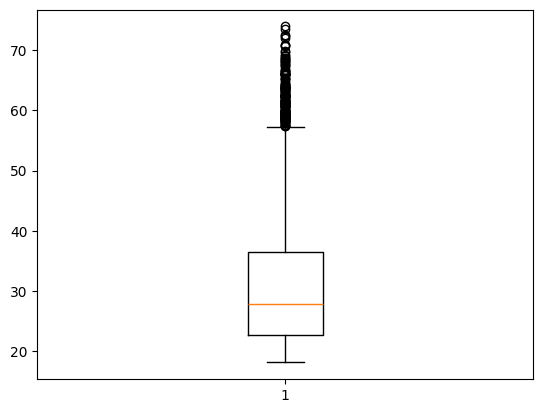

In [55]:
data = pd.read_csv('exemplo2.csv')

plt.boxplot(data['idade'])
data.info()

C:\Users\phaa2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\phaa2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\phaa2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

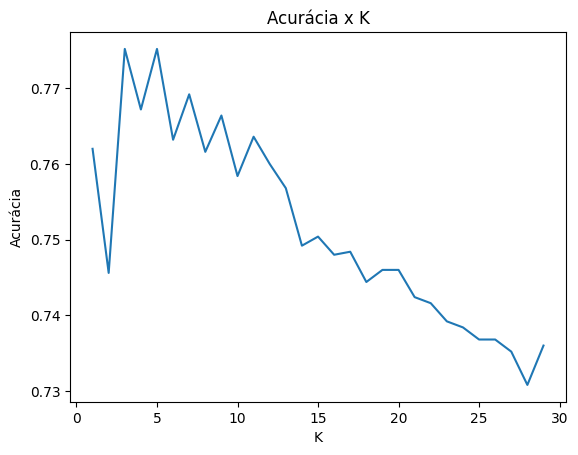

In [56]:
client = data[['idade', 'conta_corrente']]
target = data[['risco']]

# Regressão KNN
range_k = range(1, 30)
scores = []
for k in range_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, client, target, cv=10)
    scores.append(accuracy_score(target, y_pred))

plt.plot(range_k, scores)
plt.xlabel('K')
plt.ylabel('Acurácia')
plt.title('Acurácia x K')
plt.show()

In [57]:
scoresDF = pd.DataFrame(scores, index=range_k, columns=['Acurácia'])

# Melhor K
print(f"Melhor K: {scoresDF['Acurácia'].idxmax()} com acurácia de {scoresDF['Acurácia'].max():.4f}")

Melhor K: 3 com acurácia de 0.7752


## KNN com dados tratados

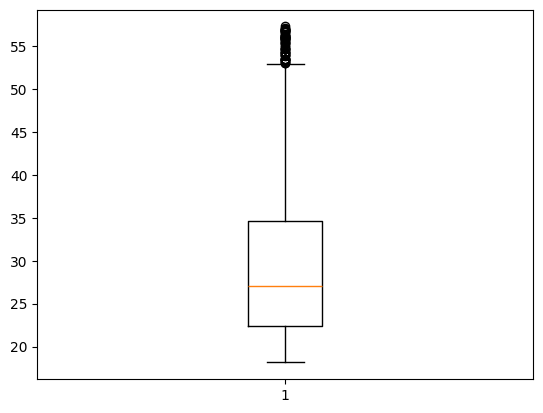

In [58]:
data = pd.read_csv('exemplo2.csv')

# Remoção dos outliers
q1 = data['idade'].quantile(0.25)
q3 = data['idade'].quantile(0.75)
iqr = q3 - q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr

# Remover outliers
data = data[(data['idade'] >= lLim) & (data['idade'] <= hLim)]
plt.boxplot(data['idade'])

client = data[['idade', 'conta_corrente']]
target = data[['risco']]

# Normalização
scalar = MinMaxScaler()
client = scalar.fit_transform(client)

K = 5 | CV: 9
K = 6 | CV: 9
K = 7 | CV: 9
K = 8 | CV: 9
K = 9 | CV: 9
K = 10 | CV: 9
K = 11 | CV: 9
K = 12 | CV: 9
K = 13 | CV: 9
K = 14 | CV: 9
K = 15 | CV: 9
K = 16 | CV: 9
K = 17 | CV: 9
K = 18 | CV: 9
K = 19 | CV: 9
K = 20 | CV: 9
K = 21 | CV: 9
K = 22 | CV: 9
K = 23 | CV: 9
K = 24 | CV: 10
K = 25 | CV: 9
K = 26 | CV: 9
K = 27 | CV: 9
K = 28 | CV: 9
K = 29 | CV: 9


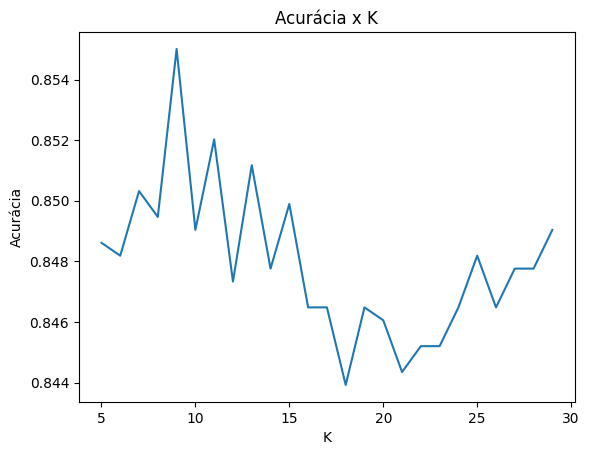

In [76]:
import warnings
warnings.filterwarnings('ignore')

# Regressão KNN
range_k = range(5, 30)

scores = []

for k in range_k:
    cvScore = []

    for cv in range(5, 15):
        knn = KNeighborsClassifier(n_neighbors=k)
        y_pred = cross_val_predict(knn, client, target, cv=cv)
        
        accuracy = accuracy_score(target, y_pred)
        cvScore.append(accuracy)    
    
    scores.append(max(cvScore))
    print(f"K = {k} | CV: {cvScore.index(max(cvScore)) + 5}")

plt.plot(range_k, scores)
plt.xlabel('K')
plt.ylabel('Acurácia')
plt.title('Acurácia x K')
plt.show()

In [77]:
scoresDF = pd.DataFrame(scores, index=range_k, columns=['Acurácia'])

# Melhor K
print(f"Melhor K: {scoresDF['Acurácia'].idxmax()} com acurácia de {scoresDF['Acurácia'].max():.4f}")

Melhor K: 9 com acurácia de 0.8550
